In [1]:
import pandas as pd

In [2]:
df = pd.read_excel('ShampooSales.xls')

In [4]:
df.head()

,Month,Shampoo Sales
0,1995-01-01,266.0
1,1995-02-01,145.9
2,1995-03-01,183.1
3,1995-04-01,119.3
4,1995-05-01,180.3


In [5]:
from pandas import datetime
from matplotlib import pyplot

Month
1995-01-01    266.0
1995-02-01    145.9
1995-03-01    183.1
1995-04-01    119.3
1995-05-01    180.3
Name: Shampoo Sales, dtype: float64


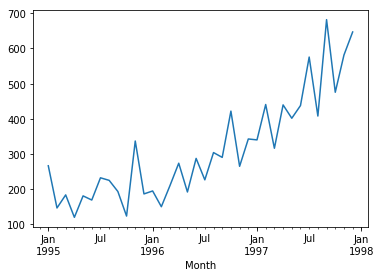

In [9]:
series = pd.read_excel('ShampooSales.xls', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(series.head())
series.plot()
pyplot.show()

There is a clear trend in the data above. Hence, it needs to be made stationary before applying the model.
We need to apply differencing operation to make it stationary(differencing of the order 1).
### **The value of parameter d = 1

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/ipykernel/__main__.py:7: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.


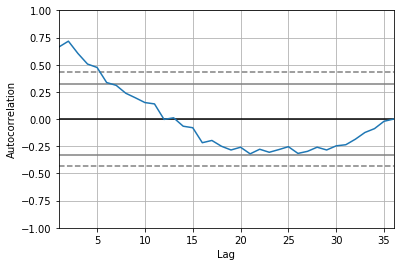

In [12]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.tools.plotting import autocorrelation_plot

series = pd.read_excel('ShampooSales.xls', header=0, parse_dates=[0], index_col=0, squeeze=True)
autocorrelation_plot(series)
pyplot.show()

The autocorrelation plot shows strong correlation starting from 5 lags and onwards. Hence, a good starting point for the parameter p would be 5
## **The value of p >= 5

The statsmodels library provides the capability to fit an ARIMA model.

An ARIMA model can be created using the statsmodels library as follows:

Define the model by calling ARIMA() and passing in the p, d, and q parameters.
The model is prepared on the training data by calling the fit() function.
Predictions can be made by calling the predict() function and specifying the index of the time or times to be predicted.
Let’s start off with something simple. We will fit an ARIMA model to the entire Shampoo Sales dataset and review the residual errors.

First, we fit an ARIMA(5,1,0) model. This sets the lag value to 5 for autoregression, uses a difference order of 1 to make the time series stationary, and uses a moving average model of 0.

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:        D.Shampoo Sales   No. Observations:                   35
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -196.170
Method:                       css-mle   S.D. of innovations             64.241
Date:                Sat, 01 Dec 2018   AIC                            406.340
Time:                        05:31:41   BIC                            417.227
Sample:                    02-01-1995   HQIC                           410.098
                         - 12-01-1997                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    12.0649      3.652      3.304      0.003       4.908      19.222
ar.L1.D.Shampoo Sales    -1.1082      0.183     -6.063      0.000      -1.466      -0.750
ar.L2.D.

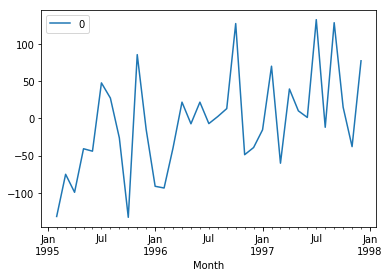

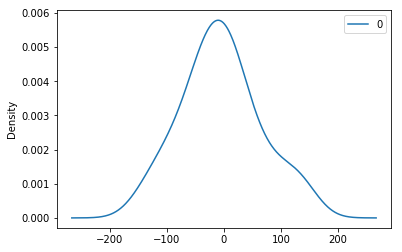

                0
count   35.000000
mean    -5.495189
std     68.132884
min   -133.296583
25%    -42.477916
50%     -7.186570
75%     24.748367
max    133.237999


In [14]:
import pandas as pd
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

series = pd.read_excel('ShampooSales.xls', header=0, parse_dates=[0], index_col=0, squeeze=True)
# fit model
model = ARIMA(series, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

******************************************************************************************************************************
* Please note that the residual plot shows that there is some trend which has gone uncaptured
* Also, the distribution follows a normal curve but does not have the mean centered around 0